In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing dataset
df=pd.read_csv(r'C:\Users\Bhupal\Downloads\M4_traffic-data_FY2023_Q2_csv\M4_passages_2022-12.csv')
df.head()

,AssetID,FinancialQtrID,Date,IntervalStart,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,M4,202302,2022-12-01,00:00,00:14,1,Car,TS0101,W,Church St Exit,-33.83,151.00,Mainline,99
1,M4,202302,2022-12-01,00:00,00:14,1,Truck,TS0101,W,Church St Exit,-33.83,151.00,Mainline,17
2,M4,202302,2022-12-01,00:00,00:14,1,Car,TS0102,E,Church St Entry,-33.83,151.00,Mainline,39
3,M4,202302,2022-12-01,00:00,00:14,1,Truck,TS0102,E,Church St Entry,-33.83,151.00,Mainline,19
4,M4,202302,2022-12-01,00:00,00:14,1,Car,TS0201,W,James Ruse Dr Entry,-33.83,151.02,Ramp,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136864 entries, 0 to 136863
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AssetID             136864 non-null  object 
 1   FinancialQtrID      136864 non-null  int64  
 2   Date                136864 non-null  object 
 3   IntervalStart       136864 non-null  object 
 4   IntervalEnd         136864 non-null  object 
 5   Version             136864 non-null  int64  
 6   VehicleClass        136864 non-null  object 
 7   TollPointID         136864 non-null  object 
 8   GantryDirection     136864 non-null  object 
 9   GantryLocation      136864 non-null  object 
 10  GantryGPSLatitude   136864 non-null  float64
 11  GantryGPSLongitude  136864 non-null  float64
 12  GantryType          136864 non-null  object 
 13  TotalVolume         136864 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 14.6+ MB


In [8]:
# Converting relevant columns to datetime
df['Date']=pd.to_datetime(df['Date'])
df['IntervalStart']=pd.to_datetime(df['IntervalStart'])
df['Hour']=df['IntervalStart'].dt.hour
df['Day_of_Week']=df['Date'].dt.day_name()

C:\Users\Bhupal\AppData\Local\Temp\ipykernel_14168\3825445977.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['IntervalStart']=pd.to_datetime(df['IntervalStart'])


In [9]:
df.head()

,AssetID,FinancialQtrID,Date,IntervalStart,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume,Hour,Day_of_Week
0,M4,202302,2022-12-01,2025-02-27,00:14,1,Car,TS0101,W,Church St Exit,-33.83,151.00,Mainline,99,0,Thursday
1,M4,202302,2022-12-01,2025-02-27,00:14,1,Truck,TS0101,W,Church St Exit,-33.83,151.00,Mainline,17,0,Thursday
2,M4,202302,2022-12-01,2025-02-27,00:14,1,Car,TS0102,E,Church St Entry,-33.83,151.00,Mainline,39,0,Thursday
3,M4,202302,2022-12-01,2025-02-27,00:14,1,Truck,TS0102,E,Church St Entry,-33.83,151.00,Mainline,19,0,Thursday
4,M4,202302,2022-12-01,2025-02-27,00:14,1,Car,TS0201,W,James Ruse Dr Entry,-33.83,151.02,Ramp,2,0,Thursday


# 1. Peak Traffic Hour Analysis

**Identifying congestion periods to recommend time-based toll adjustments or recommend alternative routes**

In [12]:
# Aggregating traffic by hour
hourly_traffic=df.groupby('Hour')['TotalVolume'].sum()

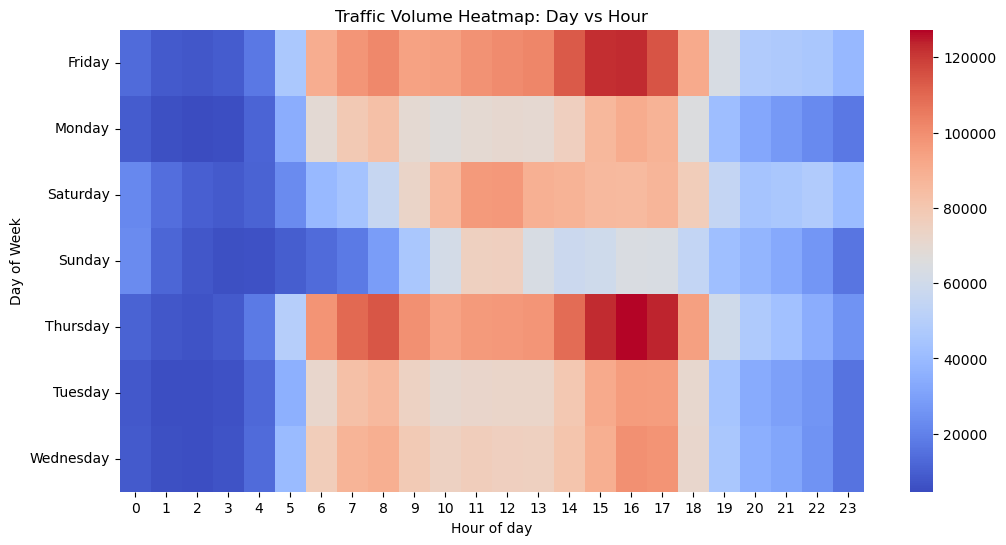

In [43]:
traffic_heatmap=df.pivot_table(index=df['Date'].dt.day_name(), columns = 'Hour', values='TotalVolume', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(traffic_heatmap, cmap="coolwarm", annot=False)
plt.xlabel("Hour of day")
plt.ylabel("Day of Week")
plt.title("Traffic Volume Heatmap: Day vs Hour")
plt.show()

` Insights/Recommendations: Peak hours are between 10-12 in the morning and 3-5 in the afternoon. Proposing time based toll pricing and alternate routes/public transport options during these hours would be beneficial `

## 2. Traffic Volume by Gantry Location

**Finding the busiest toll points**

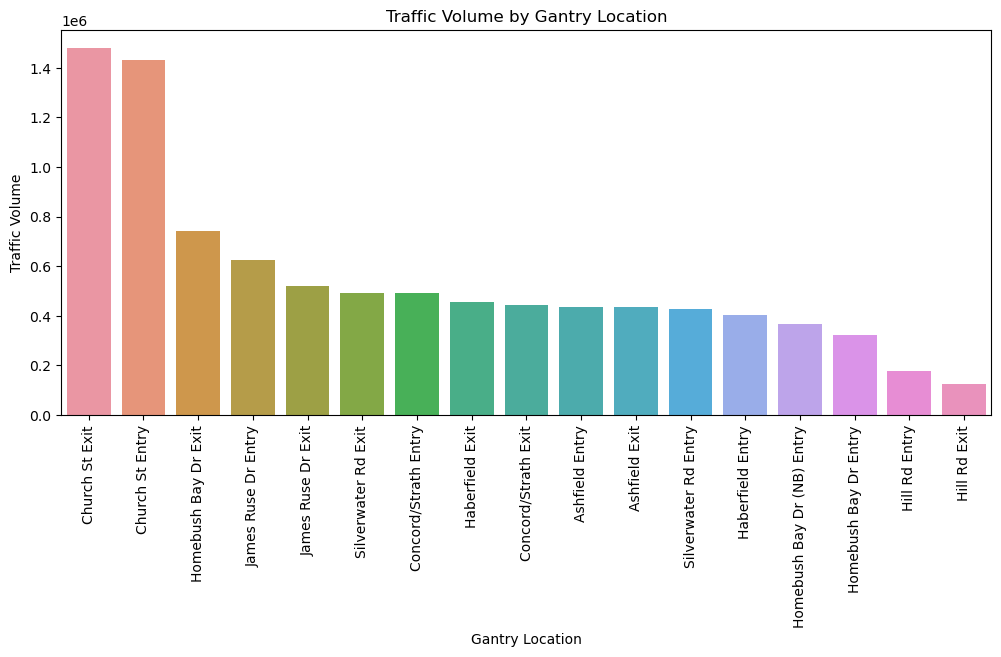

In [20]:
gantry_traffic = df.groupby('GantryLocation')['TotalVolume'].sum().sort_values(ascending=False)

#plotting
plt.figure(figsize=(12,5))
sns.barplot(x=gantry_traffic.index, y=gantry_traffic.values)
plt.xlabel("Gantry Location")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume by Gantry Location")
plt.xticks(rotation=90)
plt.show()

` Insights/Recommendations: 'Hill Rd Exit' has the lowest traffic while 'Church St Exit' has the highest of traffic amongst the gantry locations. Redistributing traffic using incentives or signageg to underutilized gantries could make spread the traffic a bit more evenly. `

## 3. Vehicle Type Distribution

**Understanding how different vehicle types contribute to the traffic and toll revenue**

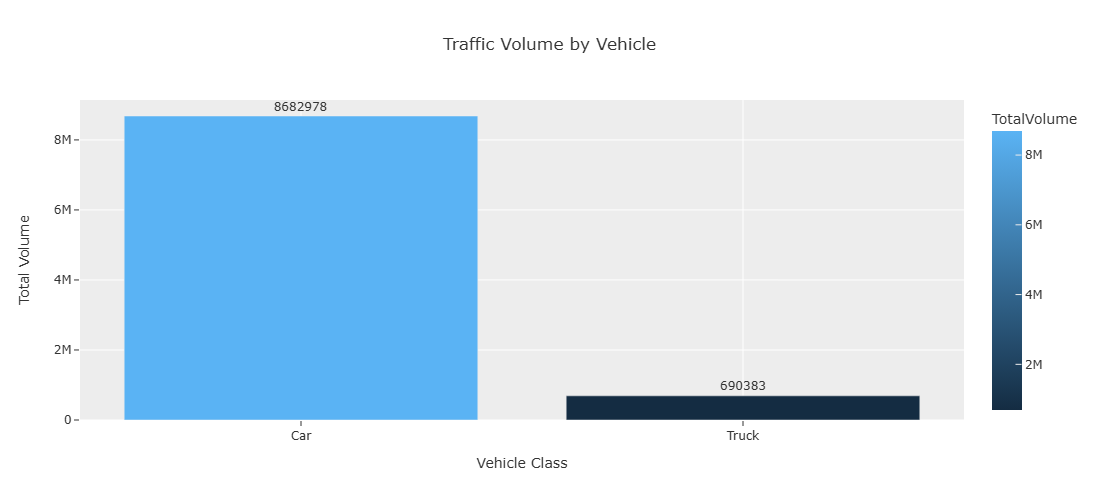

In [42]:
import plotly.express as px
vehicle_distribution = df.groupby('VehicleClass')['TotalVolume'].sum().reset_index()

fig=px.bar(vehicle_distribution, x="VehicleClass", y="TotalVolume", title="Traffic Volume by Vehicle", text="TotalVolume",color="TotalVolume", template="ggplot2")

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(width=800, height=500, xaxis_title="Vehicle Class", yaxis_title="Total Volume")
fig.show()


## 4. Weekly Traffic Trends
**Finding the days with most/least traffic through out the week**

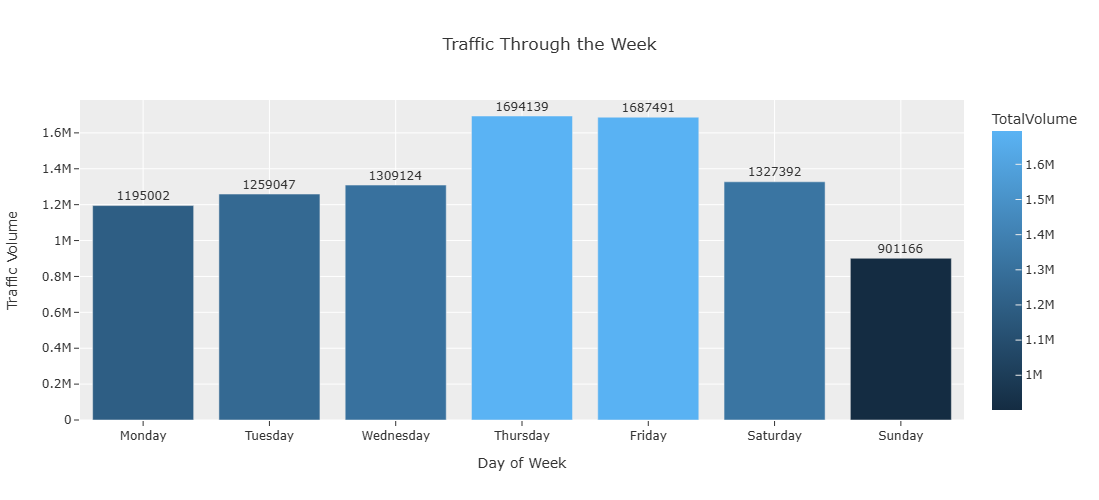

In [40]:
weekly_traffic=df.groupby("Day_of_Week")["TotalVolume"].sum().reset_index()

day_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekly_traffic["Day_of_Week"]=pd.Categorical(weekly_traffic["Day_of_Week"], categories=day_order, ordered=True)
weekly_traffic=weekly_traffic.sort_values("Day_of_Week")

fig=px.bar(weekly_traffic, x="Day_of_Week", y="TotalVolume", color="TotalVolume", text="TotalVolume", title="Traffic Through the Week", template="ggplot2")

fig.update_layout(width=800, height=500, xaxis_title="Day of Week", yaxis_title="Traffic Volume")
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

` Thursday has the highest traffic throughout the week. While Sunday has the lowest traffic. `